11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.8941 - loss: 0.3510 - val_accuracy: 0.9848 - val_loss: 0.0478
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9895 - val_loss: 0.0393
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9853 - val_loss: 0.0517
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9903 - val_loss: 0.0333
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9898 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9862 - loss: 0.0415
Test Loss: 0.03255624324083328
Test Accuracy: 0.9897000193595886
Test Accuracy: 98.97%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


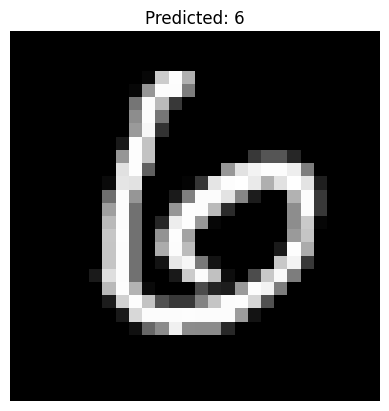

Number of misclassified images: 103


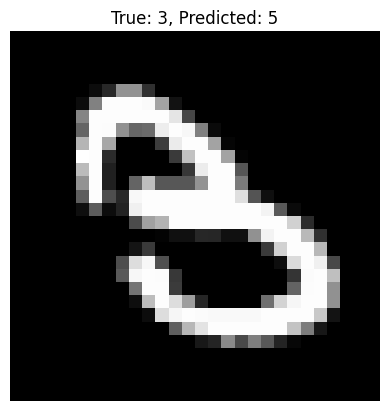

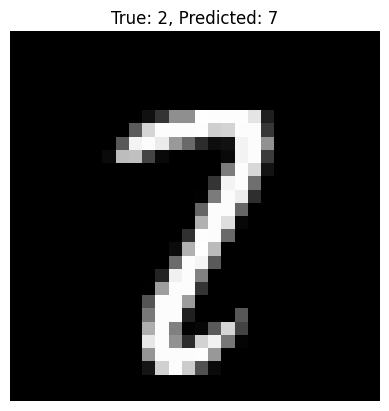

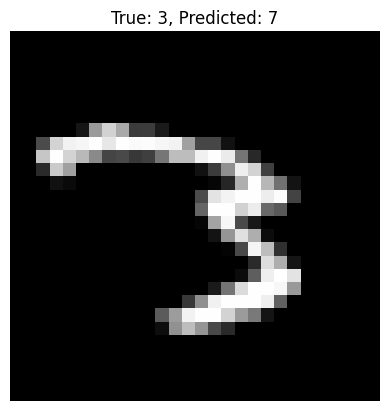

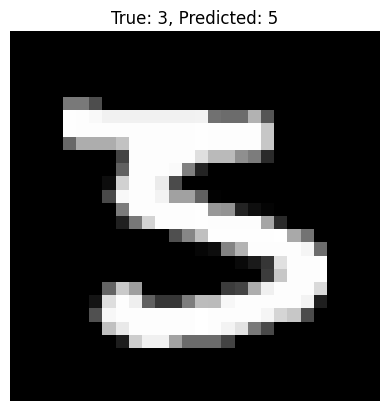

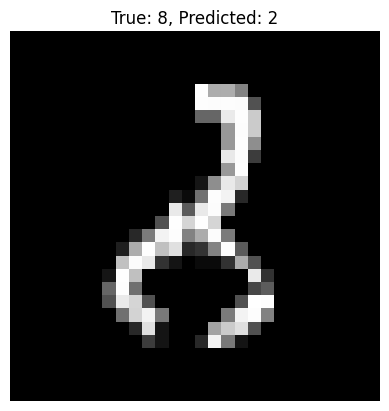

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and normalize data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)  # FIX: reshape was missing

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(x_test)

# Visualize one prediction
index = 11
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()

# Misclassified images
y_test_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)
wrong_predictions = np.where(predicted_labels != y_test_labels)[0]
print(f"Number of misclassified images: {len(wrong_predictions)}")

# Show first 5 misclassified images
for i in range(5):
    index = wrong_predictions[i]
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_labels[index]}, Predicted: {predicted_labels[index]}")
    plt.axis('off')
    plt.show()
